In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  data_path="/content/drive/MyDrive/USJ_Machine_Learning/Project2/diabetes.csv"

# Predicting Diabetes with Multilayer Neural Network

In this project, you will apply what we have learned to build a
multilayer neural network that can predict whether a patient is at risk of diabetes.

## 1- Diabetes – understanding the problem

<div style="text-align: justified">
Diabetes is a chronic medical condition that is associated with elevated blood sugar levels in the body. Diabetes often leads to cardiovascular disease, stroke, kidney damage, and long-term damage to the extremities (that is, limbs and eyes).

It is estimated that there are 415 million people in the world suffering from diabetes, with up to 5 million deaths every year attributed to diabetes-related complications. In the United States, diabetes is estimated to be the seventh highest cause of death. Clearly, diabetes is a cause of concern to the wellbeing of modern society.

Diabetes can be divided into two subtypes: type 1 and type 2. Type 1 diabetes results from the body's inability to produce sufficient insulin. Type 1 diabetes is relatively rare compared to type 2 diabetes, and it only accounts for approximately 5% of diabetes.
Unfortunately, the exact cause of type 1 diabetes is unknown and therefore, it is difficult to prevent the onset of type 1 diabetes.

Type 2 diabetes results from the body's gradual resistance to insulin. Type 2 diabetes is the prevalent form of diabetes in the world, and it is caused by excessive body weight, irregular exercise, and a poor diet. Fortunately, the onset of type 2 diabetes can be prevented and reversed if diagnosed early.

One of the barriers for early detection and diagnosis of diabetes is that the early stages of diabetes are often non-symptomatic. People who are on the path to diabetes (also known as prediabetes) often do not know that they have diabetes until it is too late.

How can we use machine learning to address this problem? If we have a labeled dataset that contains some vital measurements of patients (for example, age and blood insulin level), as well as a true label indicating the onset of diabetes in the patient sometime after the measurements were taken, then we can train a neural network on this data and use it to make predictions on new patients.

</div>

## The diabetes mellitus dataset
The dataset that we will be using for this project comes from the Pima Indians Diabetes dataset, as provided by the National Institute of Diabetes and Digestive and Kidney Diseases.

The Pima Indians are a group of native Americans living in Arizona, and they are a highly studied group of people due to their genetic predisposition to diabetes. It is believed that the Pima Indians carry a gene that allows them to survive long periods of starvation. This
thrifty gene allowed the Pima Indians to store in their bodies whatever glucose and carbohydrates they may eat, which is genetically advantageous in an environment where famines were common.

However, as society modernized and the Pima Indians began to change their diet to one of processed food, the rate of type 2 diabetes among them began to increase as well. Today, the incidence of type 2 diabetes among the Pima Indians is the highest in the world. This
makes them a highly studied group of people, as researchers attempt to find the genetic link of diabetes among the Pima Indians.

The Pima Indians diabetes dataset consists of diagnostic measurements collected from a sample of female Pima Indians, along with a label indicating whether the patient developed diabetes within five years of the initial measurement. 

In the first section, you'll perform exploratory data analysis on the Pima Indians diabetes dataset to uncover important insights about the data.

## Question 1 (10 pts)

Read the dataset into a pandas dataframe, display the first 10 samples and use `df.hist()` to plot the frequencty of every feature. 



In [ ]:
import pandas as pd
df=pd.read_csv(data_path)

df.head(10)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f625b6f4790>,
      dtype=object)

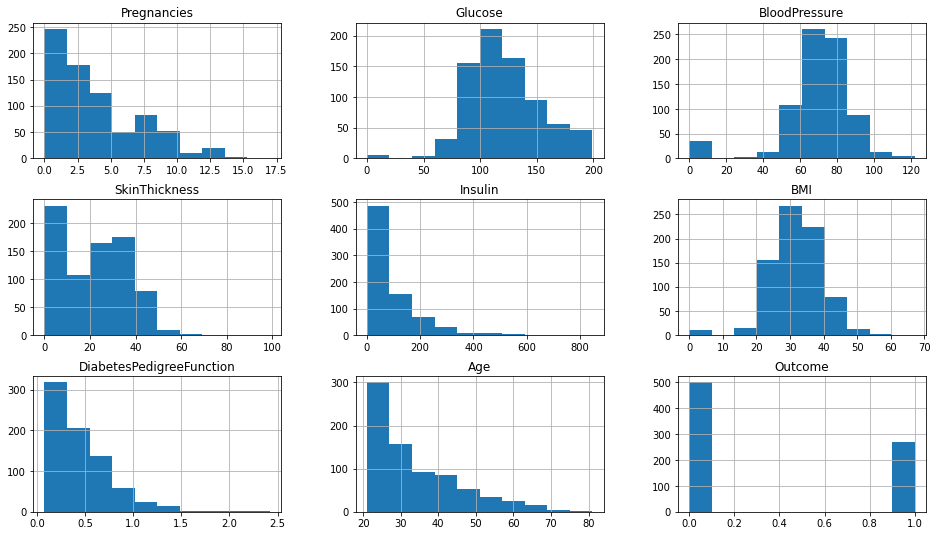

In [ ]:
df.hist(figsize=(16,9))

In [ ]:
(((df['Outcome']==1).sum())/(df.shape[0]))*100

34.89583333333333

## Question 2 (5 pts)

1- What is the most common age group? 

**Answer:** 20-25


2- From the histogram what is the probability distribution that BMI, BloodPressure and Glucose follow? (Uniform, Poisson, Normal, Gamma ...) 

**Answer:** Normal distribution


3- What is the precentage of people having Diabetes? 

**Answer:** 34.9%

## Data preprocessing

In the previous question, you have discovered that there are 0 values
in certain columns, which indicates missing values. We have also seen that the variables have different scales, which can negatively impact model performance. In this part, you will perform data preprocessing to handle these issues.

If you run `df.describe()` you will see that there is no missing values. All variables have 768 rows. But you will also notice that the `min` value of many features is 0 which is impossible. You cannot have 0 BMI or 0 Glucose ... The values were probably recorded as 0 due to certain issues during data collection. Perhaps the equipment was faulty, or the patient was unwilling to have their measurements taken.

## Question 3 (10 pts)
Write a code that counts the number of 0 value for each variable. You should display something like this:

```
Pregnencies: 111
Glucose: 5
etc...
```

In [ ]:
df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [ ]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Question 4 (15 ps)

If you have correctly solved question 3 you will notice that in the Insulin column, there are 374 rows with 0 values. That is almost half of the data that we have! Clearly, we cannot discard these rows with 0 values as that will cause a significant drop in model performance.
There are several techniques to handle these missing values:

- Remove (discard) any rows with missing values.
- Replace the missing values with the mean/median/mode of the non-missing values.
- Predict the actual values using a separate machine learning model.

Since the missing values comes from continuous variables such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI, you will replace the missing values with the mean of the non-missing values.


First, replace the 0 values in the `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns with `NaN`. Notice that we don't replace the 0 in pregnencies as those values are correct. 

Second use the function `fillna` to replace the NaN values with the mean of the non-missing values.

In [ ]:
import numpy as np

data=df.drop(["Pregnancies", "DiabetesPedigreeFunction", "Age", "Outcome"],axis=1)
data.replace(0, np.nan, inplace=True)
df["Glucose"]=data["Glucose"]
df["BloodPressure"]=data["BloodPressure"]
df["SkinThickness"]=data["SkinThickness"]
df["Insulin"]=data["Insulin"]
df["BMI"]=data["BMI"]

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df["Glucose"].fillna(int(df["Glucose"].mean()), inplace=True)
df["BloodPressure"].fillna(int(df["BloodPressure"].mean()), inplace=True)
df["SkinThickness"].fillna(int(df["SkinThickness"].mean()), inplace=True)
df["Insulin"].fillna(int(df["Insulin"].mean()), inplace=True)
df["BMI"].fillna(int(df["BMI"].mean()), inplace=True)

In [ ]:
df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  121.682292  ...   33.240885    0.348958
std       3.369578   30.435999  ...   11.760232    0.476951
min       0.000000   44.000000  ...   21.000000    0.000000
25%       1.000000   99.750000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

## Question 5 (60 pts)

Split your dataset, create a pipeline with the appropriate scaling technique and train a multilayer neural network using `GridSearchCV` to try out multiple different architecture. At the end you have to display the best architecture as well as the training and testing errors of your model. You must also diplsay the confusion matrix and all the corresponding measures from precision, recall and f1 score. 

**Hint:** Any testing accuracy above 75% will be considered as a good accuracy. Try to achieve as high of an accuracy as possible. 

**Note:** The grade for this section is split into 2 parts: 40 pts if you do all the implementation correctly and 20 pts on your test accuracy. An accuracy of less than 70% gets a 0/20. All other accuracies from all the groups are then sorted and the highest gets 20 and will linearly decrease to 0. 

In [ ]:
df.corr()

Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.127957  ...  0.544341  0.221898
Glucose                      0.127957  1.000000  ...  0.266591  0.492911
BloodPressure                0.208615  0.218615  ...  0.324915  0.165723
SkinThickness                0.081770  0.192677  ...  0.126107  0.214873
Insulin                      0.055478  0.420301  ...  0.136050  0.214278
BMI                          0.021546  0.231470  ...  0.025744  0.312249
DiabetesPedigreeFunction    -0.033523  0.137100  ...  0.033561  0.173844
Age                          0.544341  0.266591  ...  1.000000  0.238356
Outcome                      0.221898  0.492911  ...  0.238356  1.000000

[9 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledDF = scaler.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
import tensorflow as tf
import keras
from keras import models, layers, losses, optimizers, metrics

### The following **two** cells are what the GridSearchCV looks like, but I did not use them because I luckily got a better result tuning the hyperparameters on my own and it takes way too much time to get it optimized.

In [ ]:
def create_model(optimizer='Nadam', init='uniform', activation='relu'):
  model=Sequential()
  model.add(layers.Dense(8, input_dim=8, activation=activation))
  model.add(layers.Dense(128, activation=activation))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128,activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


model = KerasClassifier(build_fn=create_model, verbose=0)

optimizers = ['Adagrad','Adadelta','Adam','Adamax','Nadam']

activations = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']

epochs = [80,90,100,110,120]

batches = [3,5,10,20]

param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, activation=activations)
model = KerasClassifier(build_fn = create_model)
grid = GridSearchCV(cv=3, estimator=model, param_grid=param_grid,scoring = 'accuracy')
grid_result = grid.fit(X_train, y_train)
 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_698 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_699 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_273 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_700 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_182 (Bat (None, 128)               512       
_________________________________________________________________
dropout_274 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_701 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_703 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_704 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_276 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_705 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_184 (Bat (None, 128)               512       
_________________________________________________________________
dropout_277 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_706 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_708 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_709 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_279 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_710 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_186 (Bat (None, 128)               512       
_________________________________________________________________
dropout_280 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_711 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_713 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_714 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_282 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_715 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_188 (Bat (None, 128)               512       
_________________________________________________________________
dropout_283 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_716 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_718 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_719 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_285 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_720 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_190 (Bat (None, 128)               512       
_________________________________________________________________
dropout_286 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_721 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_723 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_724 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_288 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_725 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_192 (Bat (None, 128)               512       
_________________________________________________________________
dropout_289 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_726 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_728 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_729 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_291 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_730 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_194 (Bat (None, 128)               512       
_________________________________________________________________
dropout_292 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_731 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_733 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_734 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_294 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_735 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_196 (Bat (None, 128)               512       
_________________________________________________________________
dropout_295 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_736 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_738 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_739 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_297 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_740 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_198 (Bat (None, 128)               512       
_________________________________________________________________
dropout_298 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_741 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_743 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_744 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_300 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_745 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_200 (Bat (None, 128)               512       
_________________________________________________________________
dropout_301 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_746 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_748 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_749 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_303 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_750 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_202 (Bat (None, 128)               512       
_________________________________________________________________
dropout_304 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_751 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_753 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_754 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_306 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_755 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_204 (Bat (None, 128)               512       
_________________________________________________________________
dropout_307 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_756 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_758 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_759 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_309 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_760 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_206 (Bat (None, 128)               512       
_________________________________________________________________
dropout_310 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_761 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_763 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_764 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_312 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_765 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_208 (Bat (None, 128)               512       
_________________________________________________________________
dropout_313 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_766 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_186"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_768 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_769 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_315 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_770 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_210 (Bat (None, 128)               512       
_________________________________________________________________
dropout_316 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_771 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_773 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_774 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_318 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_775 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_212 (Bat (None, 128)               512       
_________________________________________________________________
dropout_319 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_776 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_778 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_779 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_321 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_780 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_214 (Bat (None, 128)               512       
_________________________________________________________________
dropout_322 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_781 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_783 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_784 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_324 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_785 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_216 (Bat (None, 128)               512       
_________________________________________________________________
dropout_325 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_786 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_788 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_789 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_327 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_790 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_218 (Bat (None, 128)               512       
_________________________________________________________________
dropout_328 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_791 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_793 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_794 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_330 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_795 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_220 (Bat (None, 128)               512       
_________________________________________________________________
dropout_331 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_796 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_798 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_799 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_333 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_800 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_222 (Bat (None, 128)               512       
_________________________________________________________________
dropout_334 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_801 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_803 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_804 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_336 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_805 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_224 (Bat (None, 128)               512       
_________________________________________________________________
dropout_337 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_806 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_808 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_809 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_339 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_810 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_226 (Bat (None, 128)               512       
_________________________________________________________________
dropout_340 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_811 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_813 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_814 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_342 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_815 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_228 (Bat (None, 128)               512       
_________________________________________________________________
dropout_343 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_816 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_818 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_819 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_345 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_820 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_230 (Bat (None, 128)               512       
_________________________________________________________________
dropout_346 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_821 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_823 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_824 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_348 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_825 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_232 (Bat (None, 128)               512       
_________________________________________________________________
dropout_349 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_826 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_828 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_829 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_351 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_830 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_234 (Bat (None, 128)               512       
_________________________________________________________________
dropout_352 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_831 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_833 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_834 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_354 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_835 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_236 (Bat (None, 128)               512       
_________________________________________________________________
dropout_355 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_836 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_838 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_839 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_357 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_840 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_238 (Bat (None, 128)               512       
_________________________________________________________________
dropout_358 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_841 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_843 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_844 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_360 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_845 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_240 (Bat (None, 128)               512       
_________________________________________________________________
dropout_361 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_846 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_848 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_849 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_363 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_850 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_242 (Bat (None, 128)               512       
_________________________________________________________________
dropout_364 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_851 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_853 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_854 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_366 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_855 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_244 (Bat (None, 128)               512       
_________________________________________________________________
dropout_367 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_856 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_858 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_859 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_369 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_860 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_246 (Bat (None, 128)               512       
_________________________________________________________________
dropout_370 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_861 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_863 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_864 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_372 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_865 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_248 (Bat (None, 128)               512       
_________________________________________________________________
dropout_373 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_866 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_868 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_869 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_375 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_870 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_250 (Bat (None, 128)               512       
_________________________________________________________________
dropout_376 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_871 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_873 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_874 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_378 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_875 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_252 (Bat (None, 128)               512       
_________________________________________________________________
dropout_379 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_876 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_878 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_879 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_381 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_880 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_254 (Bat (None, 128)               512       
_________________________________________________________________
dropout_382 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_881 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_883 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_884 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_384 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_885 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_256 (Bat (None, 128)               512       
_________________________________________________________________
dropout_385 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_886 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_888 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_889 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_387 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_890 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_258 (Bat (None, 128)               512       
_________________________________________________________________
dropout_388 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_891 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_893 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_894 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_390 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_895 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_260 (Bat (None, 128)               512       
_________________________________________________________________
dropout_391 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_896 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_898 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_899 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_393 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_900 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_262 (Bat (None, 128)               512       
_________________________________________________________________
dropout_394 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_901 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_903 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_904 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_396 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_905 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_264 (Bat (None, 128)               512       
_________________________________________________________________
dropout_397 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_906 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_908 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_909 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_399 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_910 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_266 (Bat (None, 128)               512       
_________________________________________________________________
dropout_400 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_911 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_913 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_914 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_402 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_915 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_268 (Bat (None, 128)               512       
_________________________________________________________________
dropout_403 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_916 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_918 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_919 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_405 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_920 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_270 (Bat (None, 128)               512       
_________________________________________________________________
dropout_406 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_921 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_923 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_924 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_408 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_925 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_272 (Bat (None, 128)               512       
_________________________________________________________________
dropout_409 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_926 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_928 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_929 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_411 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_930 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_274 (Bat (None, 128)               512       
_________________________________________________________________
dropout_412 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_931 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_933 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_934 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_414 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_935 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_276 (Bat (None, 128)               512       
_________________________________________________________________
dropout_415 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_936 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_938 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_939 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_417 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_940 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_278 (Bat (None, 128)               512       
_________________________________________________________________
dropout_418 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_941 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_943 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_944 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_420 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_945 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_280 (Bat (None, 128)               512       
_________________________________________________________________
dropout_421 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_946 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_948 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_949 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_423 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_950 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_282 (Bat (None, 128)               512       
_________________________________________________________________
dropout_424 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_951 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_953 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_954 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_426 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_955 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_284 (Bat (None, 128)               512       
_________________________________________________________________
dropout_427 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_956 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_958 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_959 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_429 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_960 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_286 (Bat (None, 128)               512       
_________________________________________________________________
dropout_430 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_961 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_963 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_964 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_432 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_965 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_288 (Bat (None, 128)               512       
_________________________________________________________________
dropout_433 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_966 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_968 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_969 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_435 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_970 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_290 (Bat (None, 128)               512       
_________________________________________________________________
dropout_436 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_971 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_973 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_974 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_438 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_975 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_292 (Bat (None, 128)               512       
_________________________________________________________________
dropout_439 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_976 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_978 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_979 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_441 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_980 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_294 (Bat (None, 128)               512       
_________________________________________________________________
dropout_442 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_981 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_983 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_984 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_444 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_985 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_296 (Bat (None, 128)               512       
_________________________________________________________________
dropout_445 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_986 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_988 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_989 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_447 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_990 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_298 (Bat (None, 128)               512       
_________________________________________________________________
dropout_448 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_991 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_993 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_994 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_450 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_995 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_300 (Bat (None, 128)               512       
_________________________________________________________________
dropout_451 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_996 (Dense)            (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_998 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_999 (Dense)            (None, 128)               1152      
_________________________________________________________________
dropout_453 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_302 (Bat (None, 128)               512       
_________________________________________________________________
dropout_454 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1001 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_456 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_304 (Bat (None, 128)               512       
_________________________________________________________________
dropout_457 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1006 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_459 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_306 (Bat (None, 128)               512       
_________________________________________________________________
dropout_460 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1011 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_462 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_308 (Bat (None, 128)               512       
_________________________________________________________________
dropout_463 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1016 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_465 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_310 (Bat (None, 128)               512       
_________________________________________________________________
dropout_466 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1021 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_468 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_312 (Bat (None, 128)               512       
_________________________________________________________________
dropout_469 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1026 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_471 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_314 (Bat (None, 128)               512       
_________________________________________________________________
dropout_472 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1031 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_474 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_316 (Bat (None, 128)               512       
_________________________________________________________________
dropout_475 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1036 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_477 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_318 (Bat (None, 128)               512       
_________________________________________________________________
dropout_478 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1041 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_480 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_320 (Bat (None, 128)               512       
_________________________________________________________________
dropout_481 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1046 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_483 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_322 (Bat (None, 128)               512       
_________________________________________________________________
dropout_484 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1051 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_486 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_324 (Bat (None, 128)               512       
_________________________________________________________________
dropout_487 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1056 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_489 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_326 (Bat (None, 128)               512       
_________________________________________________________________
dropout_490 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1061 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_492 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_328 (Bat (None, 128)               512       
_________________________________________________________________
dropout_493 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1066 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_495 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_330 (Bat (None, 128)               512       
_________________________________________________________________
dropout_496 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1071 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_498 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_332 (Bat (None, 128)               512       
_________________________________________________________________
dropout_499 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1076 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_501 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_334 (Bat (None, 128)               512       
_________________________________________________________________
dropout_502 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1081 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_504 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_336 (Bat (None, 128)               512       
_________________________________________________________________
dropout_505 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1086 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_507 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_338 (Bat (None, 128)               512       
_________________________________________________________________
dropout_508 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1091 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_510 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_340 (Bat (None, 128)               512       
_________________________________________________________________
dropout_511 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1096 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_513 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_342 (Bat (None, 128)               512       
_________________________________________________________________
dropout_514 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1101 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_516 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_344 (Bat (None, 128)               512       
_________________________________________________________________
dropout_517 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1106 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_519 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_346 (Bat (None, 128)               512       
_________________________________________________________________
dropout_520 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1111 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_522 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_348 (Bat (None, 128)               512       
_________________________________________________________________
dropout_523 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1116 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_525 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_350 (Bat (None, 128)               512       
_________________________________________________________________
dropout_526 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1121 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_528 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_352 (Bat (None, 128)               512       
_________________________________________________________________
dropout_529 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1126 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_531 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_354 (Bat (None, 128)               512       
_________________________________________________________________
dropout_532 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1131 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_534 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_356 (Bat (None, 128)               512       
_________________________________________________________________
dropout_535 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1136 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_537 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_358 (Bat (None, 128)               512       
_________________________________________________________________
dropout_538 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1141 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_540 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_360 (Bat (None, 128)               512       
_________________________________________________________________
dropout_541 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1146 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_543 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_362 (Bat (None, 128)               512       
_________________________________________________________________
dropout_544 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1151 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_546 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_364 (Bat (None, 128)               512       
_________________________________________________________________
dropout_547 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1156 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_264"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_549 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_366 (Bat (None, 128)               512       
_________________________________________________________________
dropout_550 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1161 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_552 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_368 (Bat (None, 128)               512       
_________________________________________________________________
dropout_553 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1166 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_555 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_370 (Bat (None, 128)               512       
_________________________________________________________________
dropout_556 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1171 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_558 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_372 (Bat (None, 128)               512       
_________________________________________________________________
dropout_559 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1176 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_561 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_374 (Bat (None, 128)               512       
_________________________________________________________________
dropout_562 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1181 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_564 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_376 (Bat (None, 128)               512       
_________________________________________________________________
dropout_565 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1186 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_567 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_378 (Bat (None, 128)               512       
_________________________________________________________________
dropout_568 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1191 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_570 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_380 (Bat (None, 128)               512       
_________________________________________________________________
dropout_571 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1196 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_573 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_382 (Bat (None, 128)               512       
_________________________________________________________________
dropout_574 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1201 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_576 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_384 (Bat (None, 128)               512       
_________________________________________________________________
dropout_577 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1206 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_579 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_386 (Bat (None, 128)               512       
_________________________________________________________________
dropout_580 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1211 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_582 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_388 (Bat (None, 128)               512       
_________________________________________________________________
dropout_583 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1216 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_276"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_585 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_390 (Bat (None, 128)               512       
_________________________________________________________________
dropout_586 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1221 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_588 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_392 (Bat (None, 128)               512       
_________________________________________________________________
dropout_589 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1226 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_591 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_394 (Bat (None, 128)               512       
_________________________________________________________________
dropout_592 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1231 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_594 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_396 (Bat (None, 128)               512       
_________________________________________________________________
dropout_595 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1236 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_597 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_398 (Bat (None, 128)               512       
_________________________________________________________________
dropout_598 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1241 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_600 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_400 (Bat (None, 128)               512       
_________________________________________________________________
dropout_601 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1246 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_603 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_402 (Bat (None, 128)               512       
_________________________________________________________________
dropout_604 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1251 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_606 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_404 (Bat (None, 128)               512       
_________________________________________________________________
dropout_607 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1256 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_609 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_406 (Bat (None, 128)               512       
_________________________________________________________________
dropout_610 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1261 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_612 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_408 (Bat (None, 128)               512       
_________________________________________________________________
dropout_613 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1266 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_615 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_410 (Bat (None, 128)               512       
_________________________________________________________________
dropout_616 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1271 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_618 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_412 (Bat (None, 128)               512       
_________________________________________________________________
dropout_619 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1276 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_621 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_414 (Bat (None, 128)               512       
_________________________________________________________________
dropout_622 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1281 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_624 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_416 (Bat (None, 128)               512       
_________________________________________________________________
dropout_625 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1286 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_627 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_418 (Bat (None, 128)               512       
_________________________________________________________________
dropout_628 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1291 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_630 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_420 (Bat (None, 128)               512       
_________________________________________________________________
dropout_631 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1296 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_633 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_422 (Bat (None, 128)               512       
_________________________________________________________________
dropout_634 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1301 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_636 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_424 (Bat (None, 128)               512       
_________________________________________________________________
dropout_637 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1306 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_639 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_426 (Bat (None, 128)               512       
_________________________________________________________________
dropout_640 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1311 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_642 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_428 (Bat (None, 128)               512       
_________________________________________________________________
dropout_643 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1316 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_296"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_645 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_430 (Bat (None, 128)               512       
_________________________________________________________________
dropout_646 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1321 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_648 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_432 (Bat (None, 128)               512       
_________________________________________________________________
dropout_649 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1326 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_651 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_434 (Bat (None, 128)               512       
_________________________________________________________________
dropout_652 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1331 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_299"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_654 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_436 (Bat (None, 128)               512       
_________________________________________________________________
dropout_655 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1336 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_657 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_438 (Bat (None, 128)               512       
_________________________________________________________________
dropout_658 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1341 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_660 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_440 (Bat (None, 128)               512       
_________________________________________________________________
dropout_661 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1346 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_663 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_442 (Bat (None, 128)               512       
_________________________________________________________________
dropout_664 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1351 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_666 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_444 (Bat (None, 128)               512       
_________________________________________________________________
dropout_667 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1356 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_669 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_446 (Bat (None, 128)               512       
_________________________________________________________________
dropout_670 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1361 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_672 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_448 (Bat (None, 128)               512       
_________________________________________________________________
dropout_673 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1366 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_675 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_450 (Bat (None, 128)               512       
_________________________________________________________________
dropout_676 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1371 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_678 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_452 (Bat (None, 128)               512       
_________________________________________________________________
dropout_679 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1376 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_308"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_681 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_454 (Bat (None, 128)               512       
_________________________________________________________________
dropout_682 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1381 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_684 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_456 (Bat (None, 128)               512       
_________________________________________________________________
dropout_685 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1386 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_310"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_687 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_458 (Bat (None, 128)               512       
_________________________________________________________________
dropout_688 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1391 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_690 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_460 (Bat (None, 128)               512       
_________________________________________________________________
dropout_691 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1396 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_693 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_462 (Bat (None, 128)               512       
_________________________________________________________________
dropout_694 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1401 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_696 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_464 (Bat (None, 128)               512       
_________________________________________________________________
dropout_697 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1406 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_314"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_699 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_466 (Bat (None, 128)               512       
_________________________________________________________________
dropout_700 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1411 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_702 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_468 (Bat (None, 128)               512       
_________________________________________________________________
dropout_703 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1416 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_705 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_470 (Bat (None, 128)               512       
_________________________________________________________________
dropout_706 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1421 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_708 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_472 (Bat (None, 128)               512       
_________________________________________________________________
dropout_709 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1426 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_711 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_474 (Bat (None, 128)               512       
_________________________________________________________________
dropout_712 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1431 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_714 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_476 (Bat (None, 128)               512       
_________________________________________________________________
dropout_715 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1436 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_320"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_717 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_478 (Bat (None, 128)               512       
_________________________________________________________________
dropout_718 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1441 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_720 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_480 (Bat (None, 128)               512       
_________________________________________________________________
dropout_721 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1446 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_322"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_723 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_482 (Bat (None, 128)               512       
_________________________________________________________________
dropout_724 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1451 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_726 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_484 (Bat (None, 128)               512       
_________________________________________________________________
dropout_727 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1456 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_324"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_729 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_486 (Bat (None, 128)               512       
_________________________________________________________________
dropout_730 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1461 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_732 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_488 (Bat (None, 128)               512       
_________________________________________________________________
dropout_733 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1466 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_326"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_735 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_490 (Bat (None, 128)               512       
_________________________________________________________________
dropout_736 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1471 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_738 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_492 (Bat (None, 128)               512       
_________________________________________________________________
dropout_739 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1476 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_328"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_741 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_494 (Bat (None, 128)               512       
_________________________________________________________________
dropout_742 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1481 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_744 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_496 (Bat (None, 128)               512       
_________________________________________________________________
dropout_745 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1486 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_747 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_498 (Bat (None, 128)               512       
_________________________________________________________________
dropout_748 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1491 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_750 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_500 (Bat (None, 128)               512       
_________________________________________________________________
dropout_751 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1496 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_753 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_502 (Bat (None, 128)               512       
_________________________________________________________________
dropout_754 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1501 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_756 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_504 (Bat (None, 128)               512       
_________________________________________________________________
dropout_757 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1506 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_759 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_506 (Bat (None, 128)               512       
_________________________________________________________________
dropout_760 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1511 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_762 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_508 (Bat (None, 128)               512       
_________________________________________________________________
dropout_763 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1516 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_765 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_510 (Bat (None, 128)               512       
_________________________________________________________________
dropout_766 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1521 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_768 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_512 (Bat (None, 128)               512       
_________________________________________________________________
dropout_769 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1526 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_771 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_514 (Bat (None, 128)               512       
_________________________________________________________________
dropout_772 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1531 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_774 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_516 (Bat (None, 128)               512       
_________________________________________________________________
dropout_775 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1536 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_777 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_518 (Bat (None, 128)               512       
_________________________________________________________________
dropout_778 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1541 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_780 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_520 (Bat (None, 128)               512       
_________________________________________________________________
dropout_781 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1546 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_783 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_522 (Bat (None, 128)               512       
_________________________________________________________________
dropout_784 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1551 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_786 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_524 (Bat (None, 128)               512       
_________________________________________________________________
dropout_787 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1556 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_789 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_526 (Bat (None, 128)               512       
_________________________________________________________________
dropout_790 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1561 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_792 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_528 (Bat (None, 128)               512       
_________________________________________________________________
dropout_793 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1566 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_795 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_530 (Bat (None, 128)               512       
_________________________________________________________________
dropout_796 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1571 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_798 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_532 (Bat (None, 128)               512       
_________________________________________________________________
dropout_799 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1576 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_807 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_538 (Bat (None, 128)               512       
_________________________________________________________________
dropout_808 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1591 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_810 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_540 (Bat (None, 128)               512       
_________________________________________________________________
dropout_811 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1596 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_813 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_542 (Bat (None, 128)               512       
_________________________________________________________________
dropout_814 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1601 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_816 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_544 (Bat (None, 128)               512       
_________________________________________________________________
dropout_817 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1606 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_819 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_546 (Bat (None, 128)               512       
_________________________________________________________________
dropout_820 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1611 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_822 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_548 (Bat (None, 128)               512       
_________________________________________________________________
dropout_823 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1616 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_825 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_550 (Bat (None, 128)               512       
_________________________________________________________________
dropout_826 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1621 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_828 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_552 (Bat (None, 128)               512       
_________________________________________________________________
dropout_829 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1626 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_831 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_554 (Bat (None, 128)               512       
_________________________________________________________________
dropout_832 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1631 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_834 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_556 (Bat (None, 128)               512       
_________________________________________________________________
dropout_835 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1636 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_837 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_558 (Bat (None, 128)               512       
_________________________________________________________________
dropout_838 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1641 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_840 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_560 (Bat (None, 128)               512       
_________________________________________________________________
dropout_841 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1646 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_843 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_562 (Bat (None, 128)               512       
_________________________________________________________________
dropout_844 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1651 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_846 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_564 (Bat (None, 128)               512       
_________________________________________________________________
dropout_847 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1656 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_849 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_566 (Bat (None, 128)               512       
_________________________________________________________________
dropout_850 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1661 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_852 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_568 (Bat (None, 128)               512       
_________________________________________________________________
dropout_853 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1666 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_855 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_570 (Bat (None, 128)               512       
_________________________________________________________________
dropout_856 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1671 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_858 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_572 (Bat (None, 128)               512       
_________________________________________________________________
dropout_859 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1676 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_861 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_574 (Bat (None, 128)               512       
_________________________________________________________________
dropout_862 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1681 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_864 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_576 (Bat (None, 128)               512       
_________________________________________________________________
dropout_865 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1686 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_867 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_578 (Bat (None, 128)               512       
_________________________________________________________________
dropout_868 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1691 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_870 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_580 (Bat (None, 128)               512       
_________________________________________________________________
dropout_871 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1696 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_873 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_582 (Bat (None, 128)               512       
_________________________________________________________________
dropout_874 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1701 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_876 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_584 (Bat (None, 128)               512       
_________________________________________________________________
dropout_877 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1706 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_879 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_586 (Bat (None, 128)               512       
_________________________________________________________________
dropout_880 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1711 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_882 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_588 (Bat (None, 128)               512       
_________________________________________________________________
dropout_883 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1716 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_885 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_590 (Bat (None, 128)               512       
_________________________________________________________________
dropout_886 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1721 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_888 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_592 (Bat (None, 128)               512       
_________________________________________________________________
dropout_889 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1726 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_891 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_594 (Bat (None, 128)               512       
_________________________________________________________________
dropout_892 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1731 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_894 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_596 (Bat (None, 128)               512       
_________________________________________________________________
dropout_895 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1736 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_897 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_598 (Bat (None, 128)               512       
_________________________________________________________________
dropout_898 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1741 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_900 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_600 (Bat (None, 128)               512       
_________________________________________________________________
dropout_901 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1746 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_903 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_602 (Bat (None, 128)               512       
_________________________________________________________________
dropout_904 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1751 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_906 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_604 (Bat (None, 128)               512       
_________________________________________________________________
dropout_907 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1756 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_909 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_606 (Bat (None, 128)               512       
_________________________________________________________________
dropout_910 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1761 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_912 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_608 (Bat (None, 128)               512       
_________________________________________________________________
dropout_913 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1766 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_915 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_610 (Bat (None, 128)               512       
_________________________________________________________________
dropout_916 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1771 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_918 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_612 (Bat (None, 128)               512       
_________________________________________________________________
dropout_919 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1776 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_921 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_614 (Bat (None, 128)               512       
_________________________________________________________________
dropout_922 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1781 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_924 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_616 (Bat (None, 128)               512       
_________________________________________________________________
dropout_925 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1786 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_927 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_618 (Bat (None, 128)               512       
_________________________________________________________________
dropout_928 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1791 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_930 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_620 (Bat (None, 128)               512       
_________________________________________________________________
dropout_931 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1796 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_933 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_622 (Bat (None, 128)               512       
_________________________________________________________________
dropout_934 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1801 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_936 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_624 (Bat (None, 128)               512       
_________________________________________________________________
dropout_937 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1806 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_939 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_626 (Bat (None, 128)               512       
_________________________________________________________________
dropout_940 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1811 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_942 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_628 (Bat (None, 128)               512       
_________________________________________________________________
dropout_943 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1816 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_945 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_630 (Bat (None, 128)               512       
_________________________________________________________________
dropout_946 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1821 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_948 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_632 (Bat (None, 128)               512       
_________________________________________________________________
dropout_949 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1826 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_951 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_634 (Bat (None, 128)               512       
_________________________________________________________________
dropout_952 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1831 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_954 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_636 (Bat (None, 128)               512       
_________________________________________________________________
dropout_955 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1836 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_957 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_638 (Bat (None, 128)               512       
_________________________________________________________________
dropout_958 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1841 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_960 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_640 (Bat (None, 128)               512       
_________________________________________________________________
dropout_961 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1846 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_963 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_642 (Bat (None, 128)               512       
_________________________________________________________________
dropout_964 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1851 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_966 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_644 (Bat (None, 128)               512       
_________________________________________________________________
dropout_967 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1856 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_969 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_646 (Bat (None, 128)               512       
_________________________________________________________________
dropout_970 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1861 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_972 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_648 (Bat (None, 128)               512       
_________________________________________________________________
dropout_973 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1866 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_975 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_650 (Bat (None, 128)               512       
_________________________________________________________________
dropout_976 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1871 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_978 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_652 (Bat (None, 128)               512       
_________________________________________________________________
dropout_979 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1876 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_981 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_654 (Bat (None, 128)               512       
_________________________________________________________________
dropout_982 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1881 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_984 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_656 (Bat (None, 128)               512       
_________________________________________________________________
dropout_985 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1886 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_987 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_658 (Bat (None, 128)               512       
_________________________________________________________________
dropout_988 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1891 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_990 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_660 (Bat (None, 128)               512       
_________________________________________________________________
dropout_991 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1896 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_993 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_662 (Bat (None, 128)               512       
_________________________________________________________________
dropout_994 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1901 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_996 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_664 (Bat (None, 128)               512       
_________________________________________________________________
dropout_997 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1906 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_999 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_666 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1000 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1911 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1002 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_668 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1003 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1916 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1005 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_670 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1006 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1921 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1008 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_672 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1009 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1926 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1011 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_674 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1012 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1931 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1014 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_676 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1015 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1936 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1017 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_678 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1018 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1941 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1020 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_680 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1021 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1946 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1023 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_682 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1024 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1951 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1026 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_684 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1027 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1956 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1029 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_686 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1030 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1961 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1032 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_688 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1033 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1966 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1035 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_690 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1036 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1971 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1038 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_692 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1039 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1976 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1041 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_694 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1042 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1981 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1044 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_696 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1045 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1986 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1047 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_698 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1048 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1991 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1050 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_700 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1051 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_1996 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1053 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_702 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1054 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2001 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1056 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_704 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1057 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2006 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1059 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_706 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1060 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2011 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1062 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_708 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1063 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2016 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1065 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_710 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1066 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2021 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1068 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_712 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1069 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2026 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1071 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_714 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1072 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2031 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1074 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_716 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1075 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2036 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1077 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_718 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1078 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2041 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1080 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_720 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1081 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2046 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1083 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_722 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1084 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2051 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1086 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_724 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1087 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2056 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1089 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_726 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1090 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2061 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1092 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_728 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1093 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2066 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1095 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_730 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1096 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2071 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1098 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_732 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1099 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2076 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1101 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_734 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1102 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2081 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1104 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_736 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1105 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2086 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1107 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_738 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1108 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2091 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1110 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_740 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1111 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2096 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1113 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_742 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1114 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2101 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1116 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_744 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1117 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2106 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1119 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_746 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1120 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2111 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1122 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_748 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1123 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2116 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1125 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_750 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1126 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2121 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1128 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_752 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1129 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2126 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1131 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_754 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1132 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2131 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1134 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_756 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1135 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2136 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1137 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_758 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1138 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2141 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1140 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_760 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1141 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2146 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1143 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_762 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1144 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2151 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1146 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_764 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1147 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2156 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1149 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_766 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1150 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2161 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1152 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_768 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1153 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2166 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1155 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_770 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1156 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2171 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1158 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_772 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1159 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2176 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1161 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_774 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1162 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2181 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1164 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_776 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1165 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2186 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1167 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_778 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1168 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2191 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1170 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_780 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1171 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2196 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1173 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_782 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1174 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2201 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1176 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_784 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1177 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2206 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1179 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_786 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1180 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2211 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1182 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_788 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1183 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2216 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1185 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_790 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1186 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2221 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1188 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_792 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1189 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2226 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1191 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_794 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1192 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2231 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1194 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_796 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1195 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2236 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1197 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_798 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1198 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2241 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1200 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_800 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1201 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2246 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1203 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_802 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1204 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2251 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1206 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_804 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1207 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2256 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1209 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_806 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1210 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2261 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1212 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_808 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1213 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2266 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1215 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_810 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1216 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2271 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1218 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_812 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1219 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2276 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1221 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_814 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1222 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2281 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1224 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_816 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1225 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2286 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1227 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_818 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1228 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2291 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1230 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_820 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1231 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2296 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1233 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_822 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1234 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2301 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1236 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_824 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1237 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2306 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1239 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_826 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1240 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2311 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1242 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_828 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1243 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2316 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1245 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_830 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1246 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2321 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1248 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_832 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1249 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2326 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1251 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_834 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1252 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2331 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1254 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_836 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1255 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2336 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1257 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_838 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1258 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2341 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1260 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_840 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1261 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2346 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1263 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_842 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1264 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2351 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1266 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_844 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1267 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2356 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1269 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_846 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1270 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2361 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1272 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_848 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1273 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2366 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1275 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_850 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1276 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2371 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1278 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_852 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1279 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2376 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1281 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_854 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1282 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2381 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1284 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_856 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1285 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2386 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1287 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_858 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1288 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2391 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1290 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_860 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1291 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2396 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1293 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_862 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1294 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2401 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1296 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_864 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1297 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2406 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1299 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_866 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1300 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2411 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1302 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_868 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1303 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2416 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1305 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_870 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1306 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2421 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1308 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_872 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1309 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2426 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1311 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_874 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1312 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2431 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1314 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_876 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1315 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2436 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1317 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_878 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1318 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2441 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1320 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_880 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1321 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2446 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1323 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_882 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1324 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2451 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1326 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_884 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1327 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2456 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1329 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_886 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1330 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2461 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1332 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_888 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1333 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2466 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1335 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_890 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1336 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2471 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1338 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_892 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1339 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2476 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1341 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_894 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1342 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2481 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1344 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_896 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1345 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2486 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1347 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_898 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1348 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2491 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1350 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_900 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1351 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2496 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1353 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_902 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1354 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2501 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1356 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_904 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1357 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2506 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1359 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_906 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1360 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2511 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1362 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_908 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1363 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2516 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1365 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_910 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1366 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2521 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1368 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_912 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1369 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2526 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1371 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_914 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1372 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2531 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1374 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_916 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1375 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2536 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1377 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_918 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1378 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2541 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1380 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_920 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1381 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2546 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1383 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_922 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1384 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2551 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1386 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_924 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1387 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2556 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1389 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_926 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1390 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2561 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1392 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_928 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1393 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2566 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1395 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_930 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1396 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2571 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1398 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_932 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1399 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2576 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1401 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_934 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1402 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2581 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1404 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_936 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1405 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2586 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1407 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_938 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1408 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2591 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1410 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_940 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1411 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2596 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1413 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_942 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1414 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2601 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1416 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_944 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1417 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2606 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1419 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_946 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1420 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2611 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1422 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_948 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1423 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2616 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1425 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_950 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1426 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2621 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1428 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_952 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1429 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2626 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1431 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_954 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1432 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2631 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1434 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_956 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1435 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2636 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1437 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_958 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1438 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2641 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1440 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_960 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1441 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2646 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1443 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_962 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1444 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2651 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1446 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_964 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1447 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2656 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1449 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_966 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1450 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2661 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1452 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_968 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1453 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2666 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1455 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_970 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1456 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2671 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1458 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_972 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1459 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2676 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1461 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_974 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1462 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2681 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1464 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_976 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1465 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2686 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1467 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_978 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1468 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2691 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1470 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_980 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1471 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2696 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1473 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_982 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1474 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2701 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1476 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_984 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1477 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2706 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1479 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_986 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1480 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2711 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1482 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_988 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1483 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2716 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_576"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1485 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_990 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1486 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2721 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_577"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1488 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_992 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1489 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2726 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_578"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1491 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_994 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1492 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2731 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_579"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1494 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_996 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1495 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2736 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_580"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1497 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_998 (Bat (None, 128)               512       
_________________________________________________________________
dropout_1498 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2741 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_581"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1500 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1000 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1501 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2746 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_582"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1503 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1002 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1504 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2751 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_583"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1506 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1004 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1507 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2756 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_584"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1509 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1006 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1510 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2761 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_585"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1512 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1008 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1513 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2766 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_586"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1515 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1010 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1516 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2771 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_587"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1518 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1012 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1519 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2776 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_588"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1521 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1014 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1522 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2781 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_589"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1524 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1016 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1525 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2786 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_590"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1527 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1018 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1528 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2791 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_591"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1530 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1020 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1531 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2796 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_592"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1533 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1022 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1534 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2801 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_593"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1536 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1024 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1537 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2806 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_594"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1539 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1026 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1540 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2811 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_595"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1542 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1028 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1543 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2816 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_596"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1545 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1030 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1546 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2821 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_597"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1548 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1032 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1549 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2826 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_598"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1551 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1034 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1552 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2831 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1554 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1036 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1555 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2836 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_600"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1557 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1038 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1558 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2841 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_601"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1560 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1040 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1561 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2846 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_602"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1563 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1042 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1564 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2851 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_603"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1566 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1044 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1567 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2856 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_604"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1569 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1046 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1570 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2861 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_605"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1572 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1048 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1573 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2866 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_606"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1575 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1050 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1576 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2871 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_607"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1578 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1052 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1579 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2876 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_608"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1581 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1054 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1582 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2881 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_609"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1584 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1056 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1585 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2886 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_610"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1587 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1058 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1588 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2891 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_611"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1590 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1060 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1591 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2896 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_612"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1593 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1062 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1594 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2901 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_613"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1596 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1064 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1597 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2906 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_614"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1599 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1066 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1600 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2911 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_615"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1602 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1068 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1603 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2916 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_616"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1605 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1070 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1606 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2921 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_617"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1608 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1072 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1609 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2926 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_618"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1611 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1074 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1612 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2931 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_619"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1614 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1076 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1615 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2936 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_620"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1617 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1078 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1618 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2941 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_621"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1620 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1080 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1621 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2946 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_622"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1623 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1082 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1624 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2951 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_623"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1626 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1084 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1627 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2956 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_624"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1629 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1086 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1630 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2961 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_625"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1632 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1088 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1633 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2966 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_626"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1635 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1090 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1636 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2971 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_627"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1638 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1092 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1639 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2976 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_628"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1641 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1094 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1642 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2981 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_629"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1644 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1096 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1645 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2986 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_630"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1647 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1098 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1648 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2991 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_631"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1650 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1100 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1651 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2996 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_632"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_2999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1653 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1102 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1654 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3001 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_633"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1656 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1104 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1657 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3006 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_634"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1659 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1106 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1660 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3011 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_635"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1662 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1108 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1663 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3016 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_636"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1665 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1110 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1666 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3021 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_637"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1668 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1112 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1669 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3026 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_638"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1671 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1114 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1672 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3031 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_639"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1674 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1116 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1675 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3036 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_640"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1677 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1118 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1678 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3041 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_641"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1680 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1120 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1681 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3046 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_642"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1683 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1122 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1684 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3051 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_643"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1686 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1124 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1687 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3056 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_644"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1689 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1126 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1690 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3061 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_645"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1692 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1128 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1693 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3066 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_646"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1695 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1130 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1696 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3071 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_647"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1698 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1132 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1699 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3076 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_648"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1701 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1134 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1702 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3081 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_649"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1704 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1136 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1705 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3086 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_650"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1707 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1138 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1708 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3091 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_651"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1710 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1140 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1711 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3096 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_652"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1713 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1142 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1714 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3101 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_653"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1716 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1144 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1717 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3106 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_654"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1719 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1146 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1720 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3111 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_655"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1722 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1148 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1723 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3116 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_656"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1725 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1150 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1726 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3121 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_657"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1728 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1152 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1729 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3126 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_658"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1731 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1154 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1732 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3131 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_659"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1734 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1156 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1735 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3136 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_660"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1737 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1158 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1738 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3141 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_661"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1740 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1160 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1741 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3146 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_662"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1743 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1162 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1744 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3151 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_663"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1746 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1164 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1747 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3156 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_664"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1749 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1166 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1750 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3161 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_665"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1752 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1168 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1753 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3166 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_666"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1755 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1170 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1756 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3171 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_667"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1758 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1172 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1759 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3176 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_668"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1761 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1174 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1762 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3181 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_669"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1764 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1176 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1765 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3186 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_670"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1767 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1178 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1768 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3191 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_671"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1770 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1180 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1771 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3196 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_672"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1773 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1182 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1774 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3201 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_673"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1776 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1184 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1777 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3206 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_674"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1779 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1186 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1780 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3211 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_675"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1782 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1188 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1783 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3216 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_676"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1785 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1190 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1786 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3221 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_677"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1788 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1192 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1789 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3226 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_678"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1791 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1194 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1792 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3231 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_679"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1794 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1196 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1795 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3236 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_680"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1797 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1198 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1798 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3241 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_681"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1800 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1200 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1801 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3246 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_682"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1803 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1202 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1804 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3251 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_683"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1806 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1204 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1807 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3256 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_684"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1809 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1206 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1810 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3261 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_685"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1812 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1208 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1813 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3266 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_686"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1815 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1210 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1816 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3271 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_687"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1818 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1212 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1819 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3276 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_688"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1821 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1214 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1822 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3281 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_689"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1824 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1216 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1825 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3286 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_690"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1827 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1218 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1828 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3291 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_691"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1830 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1220 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1831 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3296 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_692"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1833 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1222 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1834 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3301 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_693"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1836 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1224 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1837 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3306 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_694"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1839 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1226 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1840 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3311 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_695"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1842 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1228 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1843 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3316 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_696"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1845 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1230 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1846 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3321 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_697"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1848 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1232 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1849 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3326 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_698"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1851 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1234 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1852 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3331 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_699"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1854 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1236 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1855 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3336 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_700"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1857 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1238 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1858 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3341 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_701"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1860 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1240 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1861 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3346 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_702"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1863 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1242 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1864 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3351 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_703"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1866 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1244 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1867 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3356 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_704"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1869 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1246 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1870 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3361 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_705"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1872 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1248 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1873 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3366 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_706"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1875 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1250 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1876 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3371 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_707"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1878 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1252 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1879 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3376 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_708"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1881 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1254 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1882 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3381 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_709"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1884 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1256 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1885 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3386 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_710"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1887 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1258 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1888 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3391 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_711"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1890 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1260 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1891 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3396 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_712"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1893 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1262 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1894 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3401 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_713"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1896 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1264 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1897 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3406 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_714"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1899 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1266 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1900 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3411 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_715"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1902 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1268 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1903 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3416 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_716"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1905 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1270 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1906 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3421 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_717"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1908 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1272 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1909 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3426 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_718"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1911 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1274 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1912 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3431 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_719"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1914 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1276 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1915 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3436 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_720"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1917 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1278 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1918 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3441 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_721"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1920 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1280 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1921 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3446 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_722"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1923 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1282 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1924 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3451 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_723"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1926 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1284 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1927 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3456 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_724"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1929 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1286 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1930 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3461 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_725"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1932 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1288 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1933 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3466 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_726"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1935 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1290 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1936 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3471 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_727"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1938 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1292 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1939 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3476 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_728"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1941 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1294 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1942 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3481 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_729"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1944 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1296 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1945 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3486 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_730"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1947 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1298 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1948 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3491 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_731"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1950 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1300 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1951 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3496 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_732"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1953 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1302 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1954 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3501 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_733"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1956 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1304 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1957 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3506 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_734"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1959 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1306 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1960 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3511 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_735"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1962 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1308 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1963 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3516 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_736"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1965 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1310 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1966 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3521 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_737"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1968 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1312 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1969 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3526 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_738"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1971 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1314 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1972 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3531 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_739"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1974 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1316 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1975 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3536 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_740"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1977 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1318 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1978 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3541 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_741"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1980 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1320 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1981 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3546 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_742"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1983 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1322 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1984 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3551 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_743"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1986 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1324 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1987 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3556 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_744"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1989 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1326 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1990 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3561 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_745"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1992 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1328 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1993 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3566 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_746"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1995 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1330 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1996 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3571 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_747"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_1998 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1332 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1999 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3576 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_748"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2001 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1334 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2002 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3581 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_749"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2004 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1336 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2005 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3586 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_750"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2007 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1338 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2008 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3591 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_751"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2010 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1340 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2011 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3596 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_752"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2013 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1342 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2014 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3601 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_753"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2016 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1344 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2017 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3606 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_754"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2019 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1346 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2020 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3611 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_755"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2022 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1348 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2023 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3616 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_756"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2025 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1350 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2026 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3621 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_757"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2028 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1352 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2029 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3626 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_758"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2031 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1354 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2032 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3631 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_759"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2034 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1356 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2035 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3636 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_760"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2037 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1358 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2038 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3641 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_761"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2040 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1360 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2041 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3646 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_762"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2043 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1362 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2044 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3651 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_763"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2046 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1364 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2047 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3656 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_764"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2049 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1366 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2050 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3661 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_765"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2052 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1368 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2053 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3666 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_766"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2055 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1370 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2056 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3671 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_767"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2058 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1372 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2059 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3676 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_768"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2061 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1374 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2062 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3681 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_769"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2064 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1376 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2065 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3686 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_770"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2067 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1378 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2068 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3691 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_771"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2070 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1380 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2071 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3696 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_772"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2073 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1382 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2074 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3701 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_773"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2076 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1384 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2077 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3706 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_774"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2079 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1386 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2080 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3711 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_775"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2082 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1388 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2083 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3716 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_776"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2085 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1390 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2086 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3721 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_777"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2088 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1392 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2089 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3726 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_778"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2091 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1394 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2092 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3731 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_779"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2094 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1396 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2095 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3736 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_780"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2097 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1398 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2098 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3741 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_781"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2100 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1400 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2101 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3746 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_782"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2103 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1402 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2104 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3751 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_783"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2106 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1404 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2107 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3756 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_784"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2109 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1406 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2110 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3761 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_785"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2112 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1408 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2113 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3766 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_786"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2115 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1410 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2116 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3771 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_787"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2118 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1412 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2119 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3776 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_788"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2121 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1414 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2122 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3781 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_789"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2124 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1416 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2125 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3786 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_790"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2127 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1418 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2128 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3791 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_791"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2130 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1420 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2131 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3796 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_792"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2133 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1422 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2134 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3801 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_793"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2136 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1424 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2137 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3806 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_794"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2139 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1426 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2140 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3811 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_795"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2142 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1428 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2143 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3816 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_796"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2145 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1430 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2146 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3821 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_797"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2148 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1432 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2149 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3826 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_798"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2151 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1434 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2152 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3831 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_799"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2154 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1436 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2155 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3836 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_800"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2157 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1438 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2158 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3841 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_801"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2160 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1440 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2161 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3846 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_802"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2163 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1442 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2164 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3851 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_803"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2166 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1444 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2167 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3856 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_804"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2169 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1446 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2170 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3861 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_805"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2172 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1448 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2173 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3866 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_806"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2175 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1450 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2176 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3871 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_807"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2178 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1452 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2179 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3876 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_808"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2181 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1454 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2182 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3881 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_809"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2184 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1456 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2185 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3886 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_810"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2187 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1458 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2188 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3891 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_811"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2190 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1460 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2191 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3896 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_812"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2193 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1462 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2194 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3901 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_813"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2196 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1464 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2197 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3906 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_814"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2199 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1466 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2200 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3911 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_815"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2202 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1468 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2203 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3916 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_816"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2205 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1470 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2206 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3921 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_817"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2208 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1472 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2209 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3926 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_818"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2211 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1474 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2212 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3931 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_819"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2214 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1476 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2215 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3936 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_820"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2217 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1478 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2218 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3941 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_821"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2220 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1480 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2221 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3946 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_822"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2223 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1482 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2224 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3951 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_823"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2226 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1484 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2227 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3956 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_824"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2229 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1486 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2230 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3961 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_825"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2232 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1488 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2233 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3966 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_826"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2235 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1490 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2236 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3971 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_827"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2238 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1492 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2239 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3976 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_828"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2241 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1494 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2242 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3981 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_829"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2244 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1496 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2245 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3986 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_830"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2247 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1498 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2248 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3991 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_831"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2250 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1500 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2251 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_3996 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_832"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_3999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2253 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1502 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2254 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4001 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_833"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2256 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1504 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2257 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4006 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_834"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2259 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1506 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2260 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4011 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_835"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2262 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1508 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2263 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4016 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_836"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2265 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1510 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2266 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4021 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_837"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2268 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1512 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2269 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4026 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_838"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2271 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1514 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2272 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4031 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_839"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2274 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1516 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2275 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4036 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_840"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2277 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1518 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2278 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4041 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_841"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2280 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1520 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2281 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4046 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_842"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2283 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1522 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2284 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4051 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_843"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2286 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1524 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2287 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4056 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_844"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2289 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1526 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2290 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4061 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_845"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2292 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1528 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2293 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4066 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_846"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2295 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1530 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2296 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4071 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_847"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2298 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1532 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2299 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4076 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_848"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2301 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1534 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2302 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4081 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_849"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2304 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1536 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2305 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4086 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_850"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2307 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1538 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2308 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4091 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_851"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2310 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1540 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2311 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4096 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_852"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2313 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1542 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2314 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4101 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_853"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2316 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1544 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2317 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4106 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_854"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2319 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1546 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2320 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4111 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_855"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2322 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1548 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2323 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4116 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_856"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2325 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1550 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2326 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4121 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_857"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2328 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1552 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2329 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4126 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_858"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2331 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1554 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2332 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4131 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_859"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2334 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1556 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2335 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4136 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_860"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2337 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1558 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2338 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4141 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_861"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2340 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1560 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2341 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4146 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_862"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2343 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1562 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2344 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4151 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_863"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2346 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1564 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2347 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4156 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_864"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2349 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1566 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2350 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4161 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_865"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2352 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1568 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2353 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4166 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_866"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2355 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1570 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2356 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4171 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_867"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2358 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1572 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2359 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4176 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_868"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2361 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1574 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2362 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4181 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_869"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2364 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1576 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2365 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4186 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_870"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2367 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1578 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2368 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4191 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_871"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2370 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1580 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2371 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4196 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_872"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2373 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1582 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2374 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4201 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_873"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2376 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1584 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2377 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4206 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_874"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2379 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1586 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2380 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4211 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_875"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2382 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1588 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2383 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4216 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_876"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2385 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1590 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2386 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4221 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_877"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2388 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1592 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2389 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4226 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_878"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2391 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1594 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2392 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4231 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_879"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2394 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1596 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2395 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4236 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_880"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2397 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1598 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2398 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4241 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_881"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2400 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1600 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2401 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4246 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_882"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2403 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1602 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2404 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4251 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_883"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2406 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1604 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2407 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4256 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_884"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2409 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1606 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2410 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4261 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_885"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2412 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1608 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2413 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4266 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_886"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2415 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1610 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2416 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4271 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_887"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2418 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1612 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2419 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4276 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_888"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2421 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1614 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2422 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4281 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_889"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2424 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1616 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2425 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4286 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_890"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2427 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1618 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2428 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4291 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_891"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2430 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1620 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2431 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4296 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_892"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2433 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1622 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2434 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4301 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_893"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2436 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1624 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2437 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4306 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_894"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2439 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1626 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2440 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4311 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_895"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2442 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1628 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2443 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4316 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_896"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2445 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1630 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2446 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4321 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_897"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2448 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1632 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2449 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4326 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_898"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2451 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1634 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2452 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4331 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_899"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2454 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1636 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2455 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4336 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_900"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2457 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1638 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2458 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4341 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_901"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2460 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1640 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2461 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4346 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_902"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2463 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1642 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2464 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4351 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_903"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2466 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1644 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2467 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4356 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_904"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2469 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1646 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2470 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4361 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_905"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2472 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1648 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2473 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4366 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_906"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2475 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1650 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2476 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4371 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_907"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2478 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1652 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2479 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4376 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_908"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2481 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1654 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2482 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4381 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_909"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2484 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1656 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2485 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4386 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_910"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2487 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1658 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2488 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4391 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_911"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2490 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1660 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2491 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4396 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_912"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2493 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1662 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2494 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4401 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_913"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2496 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1664 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2497 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4406 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_914"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2499 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1666 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2500 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4411 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_915"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2502 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1668 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2503 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4416 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_916"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2505 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1670 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2506 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4421 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_917"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2508 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1672 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2509 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4426 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_918"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2511 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1674 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2512 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4431 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_919"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2514 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1676 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2515 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4436 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_920"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2517 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1678 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2518 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4441 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_921"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2520 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1680 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2521 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4446 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_922"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2523 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1682 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2524 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4451 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_923"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2526 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1684 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2527 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4456 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_924"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2529 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1686 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2530 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4461 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_925"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2532 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1688 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2533 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4466 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_926"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2535 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1690 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2536 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4471 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_927"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2538 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1692 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2539 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4476 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_928"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2541 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1694 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2542 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4481 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_929"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2544 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1696 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2545 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4486 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_930"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2547 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1698 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2548 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4491 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_931"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2550 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1700 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2551 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4496 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_932"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2553 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1702 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2554 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4501 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_933"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2556 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1704 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2557 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4506 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_934"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2559 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1706 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2560 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4511 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_935"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2562 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1708 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2563 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4516 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_936"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2565 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1710 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2566 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4521 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_937"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2568 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1712 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2569 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4526 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_938"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2571 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1714 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2572 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4531 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_939"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2574 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1716 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2575 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4536 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_940"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2577 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1718 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2578 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4541 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_941"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2580 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1720 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2581 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4546 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_942"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2583 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1722 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2584 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4551 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_943"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2586 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1724 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2587 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4556 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_944"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2589 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1726 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2590 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4561 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_945"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2592 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1728 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2593 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4566 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_946"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2595 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1730 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2596 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4571 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_947"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2598 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1732 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2599 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4576 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_948"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2601 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1734 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2602 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4581 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_949"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2604 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1736 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2605 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4586 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_950"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2607 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1738 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2608 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4591 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_951"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2610 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1740 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2611 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4596 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_952"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2613 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1742 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2614 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4601 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_953"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2616 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1744 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2617 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4606 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_954"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2619 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1746 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2620 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4611 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_955"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2622 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1748 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2623 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4616 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_956"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2625 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1750 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2626 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4621 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_957"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2628 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1752 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2629 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4626 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_958"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2631 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1754 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2632 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4631 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_959"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2634 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1756 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2635 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4636 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_960"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2637 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1758 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2638 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4641 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_961"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2640 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1760 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2641 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4646 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_962"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2643 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1762 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2644 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4651 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_963"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2646 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1764 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2647 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4656 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_964"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2649 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1766 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2650 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4661 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_965"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2652 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1768 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2653 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4666 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_966"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2655 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1770 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2656 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4671 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_967"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2658 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1772 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2659 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4676 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_968"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2661 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1774 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2662 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4681 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_969"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2664 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1776 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2665 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4686 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_970"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2667 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1778 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2668 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4691 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_971"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2670 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1780 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2671 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4696 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_972"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2673 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1782 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2674 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4701 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_973"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2676 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1784 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2677 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4706 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_974"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2679 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1786 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2680 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4711 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_975"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2682 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1788 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2683 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4716 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_976"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2685 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1790 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2686 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4721 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_977"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2688 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1792 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2689 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4726 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_978"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2691 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1794 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2692 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4731 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_979"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2694 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1796 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2695 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4736 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_980"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2697 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1798 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2698 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4741 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_981"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2700 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1800 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2701 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4746 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_982"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2703 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1802 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2704 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4751 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_983"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2706 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1804 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2707 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4756 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_984"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2709 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1806 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2710 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4761 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_985"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2712 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1808 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2713 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4766 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_986"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2715 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1810 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2716 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4771 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_987"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2718 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1812 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2719 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4776 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_988"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2721 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1814 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2722 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4781 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_989"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2724 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1816 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2725 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4786 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_990"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2727 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1818 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2728 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4791 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_991"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2730 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1820 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2731 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4796 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_992"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2733 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1822 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2734 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4801 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_993"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2736 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1824 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2737 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4806 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_994"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2739 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1826 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2740 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4811 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_995"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2742 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1828 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2743 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4816 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_996"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2745 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1830 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2746 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4821 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_997"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2748 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1832 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2749 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4826 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_998"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2751 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1834 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2752 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4831 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_999"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2754 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1836 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2755 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4836 (Dense)           (None, 128)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1000"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2757 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1838 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2758 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4841 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1001"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2760 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1840 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2761 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4846 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1002"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2763 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1842 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2764 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4851 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1003"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2766 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1844 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2767 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4856 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1004"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2769 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1846 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2770 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4861 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1005"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2772 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1848 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2773 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4866 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1006"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2775 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1850 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2776 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4871 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1007"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2778 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1852 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2779 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4876 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1008"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2781 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1854 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2782 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4881 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1009"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2784 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1856 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2785 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4886 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1010"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2787 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1858 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2788 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4891 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1011"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2790 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1860 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2791 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4896 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1012"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2793 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1862 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2794 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4901 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1013"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2796 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1864 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2797 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4906 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1014"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2799 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1866 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2800 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4911 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1015"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2802 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1868 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2803 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4916 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1016"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2805 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1870 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2806 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4921 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1017"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2808 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1872 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2809 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4926 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1018"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2811 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1874 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2812 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4931 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1019"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2814 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1876 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2815 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4936 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1020"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2817 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1878 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2818 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4941 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1021"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2820 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1880 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2821 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4946 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1022"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2823 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1882 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2824 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4951 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1023"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2826 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1884 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2827 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4956 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1024"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2829 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1886 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2830 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4961 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1025"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2832 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1888 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2833 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4966 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1026"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2835 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1890 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2836 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4971 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1027"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2838 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1892 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2839 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4976 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1028"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2841 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1894 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2842 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4981 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1029"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2844 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1896 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2845 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4986 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1030"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2847 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1898 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2848 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4991 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1031"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2850 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1900 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2851 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_4996 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1032"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_4999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2853 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1902 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2854 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5001 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1033"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2856 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1904 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2857 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5006 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1034"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2859 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1906 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2860 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5011 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1035"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2862 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1908 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2863 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5016 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1036"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2865 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1910 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2866 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5021 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1037"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2868 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1912 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2869 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5026 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1038"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2871 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1914 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2872 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5031 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1039"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2874 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1916 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2875 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5036 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1040"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2877 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1918 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2878 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5041 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1041"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2880 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1920 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2881 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5046 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1042"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2883 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1922 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2884 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5051 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1043"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2886 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1924 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2887 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5056 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1044"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2889 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1926 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2890 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5061 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1045"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2892 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1928 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2893 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5066 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1046"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2895 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1930 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2896 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5071 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1047"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2898 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1932 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2899 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5076 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1048"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2901 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1934 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2902 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5081 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1049"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2904 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1936 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2905 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5086 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1050"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2907 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1938 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2908 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5091 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1051"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2910 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1940 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2911 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5096 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1052"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2913 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1942 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2914 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5101 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1053"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2916 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1944 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2917 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5106 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1054"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2919 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1946 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2920 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5111 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1055"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2922 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1948 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2923 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5116 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1056"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2925 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1950 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2926 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5121 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1057"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2928 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1952 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2929 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5126 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1058"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2931 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1954 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2932 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5131 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1059"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2934 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1956 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2935 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5136 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1060"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2937 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1958 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2938 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5141 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1061"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2940 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1960 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2941 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5146 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1062"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2943 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1962 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2944 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5151 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1063"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2946 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1964 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2947 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5156 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1064"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2949 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1966 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2950 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5161 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1065"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2952 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1968 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2953 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5166 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1066"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2955 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1970 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2956 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5171 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1067"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2958 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1972 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2959 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5176 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1068"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2961 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1974 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2962 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5181 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1069"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2964 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1976 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2965 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5186 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1070"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2967 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1978 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2968 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5191 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1071"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2970 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1980 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2971 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5196 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1072"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2973 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1982 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2974 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5201 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1073"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2976 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1984 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2977 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5206 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1074"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2979 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1986 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2980 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5211 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1075"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2982 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1988 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2983 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5216 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1076"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2985 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1990 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2986 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5221 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1077"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2988 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1992 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2989 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5226 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1078"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2991 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1994 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2992 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5231 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1079"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2994 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1996 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2995 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5236 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1080"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_2997 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_1998 (Ba (None, 128)               512       
_________________________________________________________________
dropout_2998 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5241 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1081"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3000 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2000 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3001 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5246 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1082"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3003 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2002 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3004 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5251 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1083"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3006 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2004 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3007 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5256 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1084"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3009 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2006 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3010 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5261 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1085"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3012 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2008 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3013 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5266 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1086"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3015 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2010 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3016 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5271 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1087"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3018 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2012 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3019 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5276 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1088"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3021 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2014 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3022 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5281 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1089"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3024 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2016 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3025 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5286 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1090"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3027 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2018 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3028 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5291 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1091"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3030 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2020 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3031 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5296 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1092"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3033 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2022 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3034 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5301 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1093"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3036 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2024 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3037 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5306 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1094"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3039 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2026 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3040 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5311 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1095"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3042 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2028 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3043 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5316 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1096"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3045 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2030 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3046 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5321 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1097"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3048 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2032 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3049 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5326 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1098"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3051 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2034 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3052 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5331 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1099"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3054 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2036 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3055 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5336 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3057 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2038 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3058 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5341 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3060 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2040 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3061 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5346 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3063 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2042 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3064 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5351 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3066 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2044 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3067 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5356 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3069 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2046 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3070 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5361 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3072 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2048 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3073 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5366 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3075 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2050 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3076 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5371 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3078 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2052 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3079 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5376 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3081 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2054 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3082 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5381 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3084 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2056 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3085 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5386 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3087 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2058 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3088 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5391 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3090 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2060 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3091 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5396 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3093 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2062 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3094 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5401 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3096 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2064 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3097 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5406 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3099 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2066 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3100 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5411 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3102 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2068 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3103 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5416 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3105 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2070 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3106 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5421 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3108 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2072 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3109 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5426 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3111 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2074 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3112 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5431 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3114 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2076 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3115 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5436 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3117 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2078 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3118 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5441 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3120 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2080 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3121 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5446 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3123 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2082 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3124 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5451 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3126 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2084 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3127 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5456 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3129 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2086 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3130 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5461 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3132 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2088 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3133 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5466 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3135 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2090 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3136 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5471 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3138 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2092 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3139 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5476 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3141 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2094 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3142 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5481 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3144 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2096 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3145 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5486 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3147 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2098 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3148 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5491 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3150 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2100 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3151 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5496 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3153 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2102 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3154 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5501 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3156 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2104 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3157 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5506 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3159 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2106 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3160 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5511 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3162 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2108 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3163 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5516 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3165 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2110 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3166 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5521 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3168 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2112 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3169 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5526 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3171 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2114 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3172 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5531 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3174 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2116 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3175 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5536 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3177 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2118 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3178 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5541 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3180 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2120 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3181 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5546 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3183 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2122 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3184 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5551 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3186 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2124 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3187 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5556 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3189 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2126 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3190 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5561 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3192 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2128 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3193 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5566 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3195 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2130 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3196 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5571 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3198 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2132 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3199 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5576 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3201 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2134 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3202 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5581 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3204 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2136 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3205 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5586 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3207 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2138 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3208 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5591 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3210 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2140 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3211 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5596 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1152"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3213 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2142 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3214 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5601 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3216 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2144 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3217 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5606 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3219 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2146 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3220 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5611 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3222 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2148 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3223 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5616 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3225 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2150 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3226 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5621 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3228 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2152 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3229 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5626 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3231 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2154 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3232 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5631 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3234 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2156 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3235 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5636 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3237 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2158 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3238 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5641 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3240 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2160 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3241 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5646 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3243 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2162 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3244 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5651 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3246 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2164 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3247 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5656 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3249 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2166 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3250 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5661 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3252 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2168 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3253 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5666 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3255 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2170 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3256 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5671 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3258 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2172 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3259 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5676 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3261 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2174 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3262 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5681 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3264 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2176 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3265 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5686 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3267 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2178 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3268 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5691 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3270 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2180 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3271 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5696 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3273 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2182 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3274 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5701 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3276 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2184 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3277 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5706 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3279 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2186 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3280 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5711 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3282 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2188 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3283 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5716 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3285 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2190 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3286 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5721 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3288 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2192 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3289 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5726 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3291 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2194 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3292 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5731 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3294 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2196 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3295 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5736 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3297 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2198 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3298 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5741 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3300 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2200 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3301 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5746 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3303 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2202 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3304 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5751 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3306 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2204 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3307 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5756 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3309 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2206 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3310 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5761 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3312 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2208 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3313 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5766 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1186"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3315 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2210 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3316 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5771 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3318 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2212 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3319 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5776 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3321 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2214 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3322 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5781 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3324 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2216 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3325 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5786 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3327 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2218 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3328 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5791 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3330 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2220 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3331 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5796 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3333 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2222 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3334 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5801 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3336 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2224 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3337 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5806 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3339 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2226 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3340 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5811 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3342 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2228 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3343 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5816 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3345 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2230 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3346 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5821 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3348 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2232 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3349 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5826 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3351 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2234 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3352 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5831 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3354 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2236 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3355 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5836 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3357 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2238 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3358 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5841 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3360 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2240 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3361 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5846 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3363 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2242 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3364 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5851 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3366 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2244 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3367 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5856 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3369 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2246 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3370 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5861 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3372 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2248 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3373 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5866 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3375 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2250 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3376 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5871 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3378 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2252 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3379 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5876 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3381 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2254 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3382 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5881 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3384 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2256 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3385 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5886 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3387 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2258 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3388 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5891 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3390 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2260 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3391 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5896 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3393 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2262 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3394 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5901 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3396 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2264 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3397 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5906 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3399 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2266 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3400 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5911 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3402 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2268 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3403 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5916 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3405 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2270 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3406 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5921 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3408 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2272 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3409 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5926 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3411 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2274 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3412 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5931 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3414 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2276 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3415 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5936 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3417 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2278 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3418 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5941 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3420 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2280 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3421 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5946 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3423 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2282 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3424 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5951 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3426 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2284 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3427 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5956 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3429 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2286 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3430 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5961 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3432 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2288 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3433 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5966 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3435 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2290 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3436 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5971 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3438 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2292 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3439 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5976 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3441 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2294 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3442 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5981 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3444 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2296 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3445 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5986 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3447 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2298 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3448 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5991 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3450 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2300 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3451 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_5996 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_5999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3453 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2302 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3454 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6001 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3456 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2304 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3457 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6006 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3459 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2306 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3460 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6011 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3462 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2308 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3463 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6016 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3465 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2310 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3466 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6021 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3468 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2312 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3469 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6026 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3471 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2314 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3472 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6031 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3474 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2316 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3475 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6036 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3477 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2318 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3478 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6041 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3480 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2320 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3481 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6046 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3483 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2322 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3484 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6051 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3486 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2324 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3487 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6056 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3489 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2326 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3490 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6061 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3492 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2328 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3493 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6066 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3495 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2330 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3496 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6071 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3498 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2332 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3499 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6076 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3501 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2334 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3502 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6081 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3504 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2336 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3505 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6086 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3507 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2338 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3508 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6091 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3510 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2340 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3511 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6096 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3513 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2342 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3514 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6101 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3516 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2344 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3517 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6106 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3519 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2346 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3520 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6111 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3522 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2348 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3523 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6116 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3525 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2350 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3526 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6121 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3528 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2352 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3529 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6126 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3531 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2354 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3532 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6131 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3534 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2356 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3535 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6136 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3537 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2358 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3538 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6141 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3540 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2360 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3541 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6146 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3543 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2362 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3544 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6151 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3546 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2364 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3547 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6156 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1264"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3549 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2366 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3550 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6161 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3552 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2368 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3553 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6166 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3555 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2370 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3556 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6171 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3558 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2372 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3559 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6176 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3561 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2374 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3562 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6181 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3564 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2376 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3565 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6186 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3567 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2378 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3568 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6191 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3570 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2380 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3571 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6196 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3573 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2382 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3574 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6201 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3576 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2384 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3577 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6206 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3579 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2386 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3580 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6211 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3582 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2388 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3583 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6216 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1276"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3585 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2390 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3586 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6221 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3588 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2392 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3589 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6226 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3591 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2394 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3592 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6231 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3594 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2396 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3595 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6236 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3597 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2398 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3598 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6241 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3600 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2400 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3601 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6246 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3603 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2402 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3604 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6251 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3606 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2404 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3607 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6256 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3609 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2406 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3610 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6261 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3612 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2408 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3613 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6266 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3615 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2410 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3616 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6271 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3618 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2412 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3619 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6276 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3621 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2414 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3622 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6281 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3624 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2416 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3625 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6286 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3627 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2418 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3628 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6291 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3630 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2420 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3631 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6296 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3633 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2422 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3634 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6301 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3636 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2424 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3637 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6306 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3639 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2426 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3640 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6311 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3642 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2428 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3643 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6316 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1296"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3645 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2430 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3646 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6321 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3648 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2432 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3649 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6326 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3651 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2434 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3652 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6331 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1299"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3654 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2436 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3655 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6336 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3657 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2438 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3658 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6341 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3660 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2440 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3661 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6346 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3663 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2442 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3664 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6351 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3666 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2444 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3667 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6356 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3669 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2446 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3670 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6361 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3672 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2448 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3673 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6366 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3675 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2450 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3676 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6371 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3678 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2452 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3679 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6376 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1308"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3681 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2454 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3682 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6381 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3684 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2456 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3685 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6386 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1310"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3687 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2458 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3688 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6391 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3690 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2460 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3691 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6396 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3693 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2462 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3694 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6401 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3696 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2464 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3697 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6406 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1314"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3699 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2466 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3700 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6411 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3702 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2468 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3703 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6416 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3705 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2470 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3706 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6421 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3708 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2472 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3709 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6426 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3711 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2474 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3712 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6431 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3714 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2476 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3715 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6436 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1320"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3717 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2478 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3718 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6441 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3720 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2480 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3721 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6446 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1322"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3723 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2482 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3724 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6451 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3726 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2484 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3727 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6456 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1324"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3729 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2486 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3730 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6461 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3732 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2488 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3733 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6466 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1326"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3735 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2490 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3736 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6471 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3738 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2492 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3739 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6476 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1328"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3741 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2494 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3742 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6481 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3744 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2496 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3745 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6486 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3747 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2498 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3748 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6491 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3750 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2500 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3751 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6496 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3753 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2502 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3754 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6501 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3756 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2504 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3757 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6506 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3759 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2506 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3760 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6511 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3762 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2508 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3763 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6516 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3765 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2510 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3766 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6521 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3768 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2512 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3769 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6526 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3771 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2514 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3772 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6531 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3774 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2516 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3775 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6536 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3777 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2518 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3778 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6541 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3780 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2520 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3781 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6546 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3783 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2522 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3784 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6551 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3786 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2524 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3787 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6556 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3789 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2526 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3790 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6561 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3792 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2528 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3793 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6566 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3795 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2530 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3796 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6571 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3798 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2532 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3799 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6576 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1348"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3801 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2534 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3802 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6581 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3804 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2536 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3805 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6586 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3807 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2538 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3808 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6591 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3810 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2540 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3811 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6596 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3813 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2542 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3814 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6601 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3816 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2544 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3817 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6606 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3819 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2546 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3820 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6611 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3822 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2548 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3823 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6616 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3825 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2550 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3826 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6621 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3828 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2552 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3829 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6626 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3831 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2554 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3832 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6631 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3834 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2556 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3835 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6636 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3837 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2558 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3838 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6641 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3840 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2560 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3841 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6646 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3843 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2562 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3844 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6651 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3846 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2564 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3847 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6656 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3849 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2566 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3850 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6661 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3852 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2568 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3853 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6666 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3855 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2570 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3856 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6671 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3858 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2572 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3859 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6676 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3861 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2574 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3862 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6681 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3864 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2576 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3865 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6686 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3867 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2578 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3868 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6691 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3870 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2580 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3871 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6696 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3873 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2582 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3874 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6701 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3876 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2584 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3877 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6706 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3879 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2586 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3880 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6711 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3882 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2588 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3883 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6716 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3885 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2590 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3886 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6721 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3888 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2592 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3889 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6726 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3891 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2594 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3892 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6731 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3894 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2596 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3895 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6736 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3897 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2598 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3898 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6741 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3900 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2600 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3901 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6746 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3903 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2602 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3904 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6751 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3906 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2604 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3907 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6756 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3909 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2606 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3910 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6761 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3912 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2608 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3913 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6766 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3915 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2610 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3916 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6771 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3918 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2612 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3919 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6776 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3921 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2614 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3922 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6781 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3924 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2616 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3925 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6786 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3927 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2618 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3928 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6791 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3930 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2620 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3931 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6796 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3933 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2622 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3934 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6801 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3936 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2624 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3937 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6806 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3939 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2626 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3940 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6811 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3942 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2628 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3943 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6816 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3945 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2630 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3946 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6821 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3948 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2632 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3949 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6826 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3951 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2634 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3952 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6831 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3954 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2636 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3955 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6836 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3957 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2638 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3958 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6841 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3960 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2640 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3961 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6846 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3963 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2642 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3964 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6851 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3966 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2644 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3967 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6856 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3969 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2646 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3970 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6861 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3972 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2648 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3973 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6866 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3975 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2650 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3976 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6871 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3978 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2652 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3979 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6876 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3981 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2654 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3982 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6881 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3984 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2656 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3985 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6886 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3987 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2658 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3988 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6891 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3990 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2660 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3991 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6896 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3993 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2662 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3994 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6901 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6903 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6904 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3996 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6905 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2664 (Ba (None, 128)               512       
_________________________________________________________________
dropout_3997 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6906 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6908 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6909 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_3999 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6910 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2666 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4000 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6911 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6913 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6914 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4002 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6915 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2668 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4003 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6916 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6918 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6919 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4005 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6920 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2670 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4006 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6921 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6923 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6924 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4008 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6925 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2672 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4009 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6926 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6928 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6929 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4011 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6930 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2674 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4012 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6931 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6933 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6934 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4014 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6935 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2676 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4015 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6936 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6938 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6939 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4017 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6940 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2678 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4018 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6941 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6943 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6944 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4020 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6945 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2680 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4021 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6946 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6948 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6949 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4023 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6950 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2682 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4024 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6951 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6953 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6954 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4026 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6955 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2684 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4027 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6956 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6958 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6959 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4029 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6960 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2686 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4030 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6961 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6963 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6964 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4032 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6965 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2688 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4033 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6966 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6968 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6969 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4035 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6970 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2690 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4036 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6971 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6973 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6974 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4038 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6975 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2692 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4039 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6976 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6978 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6979 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4041 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6980 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2694 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4042 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6981 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6983 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6984 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4044 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6985 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2696 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4045 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6986 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6988 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6989 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4047 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6990 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2698 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4048 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6991 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6993 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6994 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4050 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6995 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2700 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4051 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_6996 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6998 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_6999 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4053 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7000 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2702 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4054 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7001 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7003 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7004 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4056 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7005 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2704 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4057 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7006 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7008 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7009 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4059 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7010 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2706 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4060 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7011 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7013 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7014 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4062 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7015 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2708 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4063 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7016 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7018 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7019 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4065 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7020 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2710 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4066 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7021 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7023 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7024 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4068 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7025 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2712 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4069 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7026 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7028 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7029 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4071 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7030 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2714 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4072 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7031 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7033 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7034 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4074 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7035 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2716 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4075 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7036 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7038 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7039 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4077 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7040 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2718 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4078 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7041 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7043 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7044 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4080 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7045 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2720 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4081 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7046 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7048 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7049 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4083 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7050 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2722 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4084 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7051 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7053 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7054 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4086 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7055 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2724 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4087 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7056 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7058 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7059 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4089 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7060 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2726 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4090 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7061 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7063 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7064 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4092 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7065 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2728 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4093 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7066 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7068 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7069 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4095 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7070 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2730 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4096 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7071 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7073 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7074 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4098 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7075 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2732 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4099 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7076 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7078 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7079 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4101 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7080 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2734 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4102 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7081 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7083 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7084 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4104 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7085 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2736 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4105 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7086 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7088 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7089 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4107 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7090 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2738 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4108 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7091 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7093 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7094 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4110 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7095 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2740 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4111 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7096 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7098 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7099 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4113 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7100 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2742 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4114 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7101 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7103 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7104 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4116 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7105 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2744 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4117 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7106 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7108 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7109 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4119 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7110 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2746 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4120 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7111 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7113 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7114 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4122 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7115 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2748 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4123 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7116 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7118 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7119 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4125 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7120 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2750 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4126 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7121 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7123 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7124 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4128 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7125 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2752 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4129 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7126 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7128 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7129 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4131 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7130 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2754 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4132 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7131 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7133 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7134 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4134 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7135 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2756 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4135 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7136 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7138 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7139 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4137 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7140 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2758 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4138 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7141 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7143 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7144 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4140 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7145 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2760 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4141 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7146 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7148 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7149 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4143 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7150 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2762 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4144 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7151 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7153 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7154 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4146 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7155 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2764 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4147 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7156 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7158 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7159 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4149 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7160 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2766 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4150 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7161 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7163 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7164 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4152 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7165 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2768 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4153 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7166 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7168 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7169 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4155 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7170 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2770 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4156 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7171 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7173 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7174 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4158 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7175 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2772 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4159 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7176 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7178 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7179 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4161 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7180 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2774 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4162 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7181 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7183 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7184 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4164 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7185 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2776 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4165 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7186 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7188 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7189 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4167 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7190 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2778 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4168 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7191 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7193 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7194 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4170 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7195 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2780 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4171 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7196 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7198 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7199 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4173 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7200 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2782 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4174 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7201 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7203 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7204 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4176 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7205 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2784 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4177 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7206 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7208 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7209 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4179 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7210 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2786 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4180 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7211 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7213 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7214 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4182 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7215 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2788 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4183 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7216 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7218 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7219 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4185 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7220 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2790 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4186 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7221 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7223 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7224 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4188 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7225 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2792 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4189 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7226 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7228 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7229 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4191 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7230 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2794 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4192 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7231 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7233 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7234 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4194 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7235 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2796 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4195 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7236 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7238 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7239 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4197 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7240 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2798 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4198 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7241 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7243 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7244 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4200 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7245 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2800 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4201 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7246 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7249 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4203 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7250 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2802 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4204 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7251 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7253 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7254 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4206 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7255 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2804 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4207 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7256 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7258 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7259 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4209 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7260 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2806 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4210 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7261 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7263 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7264 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4212 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7265 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2808 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4213 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7266 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7268 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7269 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4215 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7270 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2810 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4216 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7271 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7273 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7274 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4218 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7275 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2812 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4219 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7276 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7278 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7279 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4221 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7280 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2814 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4222 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7281 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7283 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7284 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4224 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7285 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2816 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4225 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7286 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7288 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7289 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4227 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7290 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2818 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4228 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7291 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7293 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7294 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4230 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7295 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2820 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4231 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7296 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7298 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7299 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4233 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7300 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2822 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4234 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7301 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7303 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7304 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4236 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7305 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2824 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4237 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7306 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7308 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7309 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4239 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7310 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2826 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4240 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7311 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7313 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7314 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4242 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7315 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2828 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4243 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7316 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7318 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7319 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4245 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7320 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2830 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4246 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7321 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7323 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7324 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4248 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7325 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2832 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4249 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7326 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7328 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7329 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4251 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7330 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2834 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4252 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7331 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7333 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7334 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4254 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7335 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2836 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4255 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7336 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7338 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7339 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4257 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7340 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2838 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4258 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7341 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7343 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7344 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4260 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7345 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2840 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4261 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7346 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7348 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7349 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4263 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7350 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2842 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4264 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7351 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7353 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7354 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4266 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7355 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2844 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4267 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7356 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7358 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7359 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4269 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7360 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2846 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4270 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7361 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7363 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7364 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4272 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7365 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2848 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4273 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7366 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7368 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7369 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4275 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7370 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2850 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4276 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7371 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7373 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7374 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4278 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7375 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2852 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4279 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7376 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7378 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7379 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4281 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7380 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2854 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4282 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7381 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7383 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7384 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4284 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7385 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2856 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4285 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7386 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7388 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7389 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4287 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7390 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2858 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4288 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7391 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7393 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7394 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4290 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7395 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2860 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4291 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7396 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7398 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7399 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4293 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7400 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2862 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4294 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7401 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7403 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7404 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4296 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7405 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2864 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4297 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7406 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7408 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7409 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4299 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7410 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2866 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4300 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7411 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7413 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7414 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4302 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7415 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2868 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4303 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7416 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7418 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7419 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4305 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7420 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2870 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4306 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7421 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7423 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7424 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4308 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7425 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2872 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4309 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7426 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7428 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7429 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4311 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7430 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2874 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4312 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7431 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7433 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7434 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4314 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7435 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2876 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4315 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7436 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7438 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7439 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4317 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7440 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2878 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4318 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7441 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7443 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7444 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4320 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7445 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2880 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4321 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7446 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7448 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7449 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4323 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7450 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2882 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4324 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7451 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7453 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7454 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4326 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7455 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2884 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4327 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7456 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7458 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7459 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4329 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7460 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2886 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4330 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7461 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7463 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7464 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4332 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7465 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2888 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4333 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7466 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7468 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7469 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4335 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7470 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2890 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4336 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7471 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7473 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7474 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4338 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7475 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2892 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4339 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7476 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7478 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7479 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4341 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7480 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2894 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4342 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7481 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7483 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7484 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4344 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7485 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2896 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4345 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7486 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7488 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7489 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4347 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7490 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2898 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4348 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7491 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7493 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7494 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4350 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7495 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2900 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4351 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7496 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7498 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7499 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4353 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7500 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2902 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4354 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7501 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7503 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7504 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4356 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7505 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2904 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4357 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7506 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7508 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7509 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4359 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7510 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2906 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4360 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7511 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7513 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7514 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4362 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7515 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2908 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4363 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7516 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7518 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7519 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4365 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7520 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2910 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4366 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7521 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7523 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7524 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4368 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7525 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2912 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4369 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7526 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7528 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7529 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4371 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7530 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2914 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4372 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7531 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7533 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7534 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4374 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7535 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2916 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4375 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7536 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7538 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7539 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4377 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7540 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2918 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4378 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7541 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7543 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7544 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4380 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7545 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2920 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4381 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7546 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7548 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7549 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4383 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7550 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2922 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4384 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7551 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7553 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7554 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4386 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7555 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2924 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4387 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7556 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7558 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7559 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4389 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7560 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2926 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4390 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7561 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7563 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7564 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4392 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7565 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2928 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4393 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7566 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7568 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7569 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4395 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7570 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2930 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4396 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7571 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7573 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7574 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4398 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7575 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2932 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4399 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7576 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7578 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7579 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4401 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7580 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2934 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4402 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7581 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7583 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7584 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4404 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7585 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2936 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4405 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7586 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7588 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7589 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4407 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7590 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2938 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4408 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7591 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7593 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7594 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4410 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7595 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2940 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4411 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7596 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7598 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7599 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4413 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7600 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2942 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4414 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7601 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7603 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7604 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4416 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7605 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2944 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4417 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7606 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7608 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7609 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4419 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7610 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2946 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4420 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7611 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7613 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7614 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4422 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7615 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2948 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4423 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7616 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7618 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7619 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4425 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7620 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2950 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4426 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7621 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7623 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7624 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4428 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7625 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2952 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4429 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7626 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7628 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7629 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4431 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7630 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2954 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4432 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7631 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7633 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7634 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4434 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7635 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2956 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4435 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7636 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7638 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7639 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4437 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7640 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2958 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4438 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7641 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7643 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7644 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4440 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7645 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2960 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4441 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7646 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7648 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7649 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4443 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7650 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2962 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4444 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7651 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7653 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7654 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4446 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7655 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2964 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4447 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7656 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7658 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7659 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4449 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7660 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2966 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4450 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7661 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7663 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7664 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4452 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7665 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2968 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4453 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7666 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7668 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7669 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4455 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7670 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2970 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4456 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7671 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7673 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7674 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4458 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7675 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2972 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4459 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7676 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7678 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7679 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4461 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7680 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2974 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4462 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7681 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7683 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7684 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4464 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7685 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2976 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4465 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7686 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7688 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7689 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4467 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7690 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2978 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4468 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7691 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7693 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7694 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4470 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7695 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2980 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4471 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7696 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7698 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7699 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4473 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7700 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2982 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4474 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7701 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7703 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7704 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4476 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7705 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2984 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4477 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7706 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7708 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7709 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4479 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7710 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2986 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4480 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7711 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7713 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7714 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4482 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7715 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2988 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4483 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7716 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1576"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7718 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7719 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4485 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7720 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2990 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4486 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7721 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1577"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7723 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7724 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4488 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7725 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2992 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4489 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7726 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1578"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7728 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7729 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4491 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7730 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2994 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4492 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7731 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1579"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7733 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7734 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4494 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7735 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2996 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4495 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7736 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1580"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7738 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7739 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4497 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7740 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_2998 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4498 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7741 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1581"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7743 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7744 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4500 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7745 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3000 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4501 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7746 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1582"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7748 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7749 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4503 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7750 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3002 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4504 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7751 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1583"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7753 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7754 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4506 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7755 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3004 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4507 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7756 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1584"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7758 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7759 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4509 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7760 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3006 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4510 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7761 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1585"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7763 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7764 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4512 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7765 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3008 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4513 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7766 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1586"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7768 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7769 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4515 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7770 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3010 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4516 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7771 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1587"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7773 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7774 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4518 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7775 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3012 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4519 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7776 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1588"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7778 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7779 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4521 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7780 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3014 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4522 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7781 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1589"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7783 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7784 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4524 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7785 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3016 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4525 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7786 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1590"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7788 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7789 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4527 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7790 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3018 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4528 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7791 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1591"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7793 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7794 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4530 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7795 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3020 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4531 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7796 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1592"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7798 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7799 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4533 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7800 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3022 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4534 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7801 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1593"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7803 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7804 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4536 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7805 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3024 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4537 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7806 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1594"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7808 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7809 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4539 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7810 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3026 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4540 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7811 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1595"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7813 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7814 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4542 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7815 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3028 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4543 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7816 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1596"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7818 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7819 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4545 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7820 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3030 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4546 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7821 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1597"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7823 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7824 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4548 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7825 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3032 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4549 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7826 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1598"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7828 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7829 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4551 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7830 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3034 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4552 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7831 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7833 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7834 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4554 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7835 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3036 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4555 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7836 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1600"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7838 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7839 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4557 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7840 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3038 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4558 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7841 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1601"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7843 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7844 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4560 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7845 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3040 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4561 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7846 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1602"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7848 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7849 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4563 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7850 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3042 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4564 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7851 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1603"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7853 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7854 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4566 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7855 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3044 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4567 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7856 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1604"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7858 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7859 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4569 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7860 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3046 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4570 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7861 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1605"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7863 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7864 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4572 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7865 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3048 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4573 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7866 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1606"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7868 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7869 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4575 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7870 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3050 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4576 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7871 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1607"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7873 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7874 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4578 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7875 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3052 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4579 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7876 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1608"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7878 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7879 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4581 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7880 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3054 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4582 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7881 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1609"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7883 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7884 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4584 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7885 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3056 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4585 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7886 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1610"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7888 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7889 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4587 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7890 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3058 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4588 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7891 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1611"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7893 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7894 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4590 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7895 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3060 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4591 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7896 (Dense)           (None, 128)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_1612"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7898 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_7899 (Dense)           (None, 128)               1152      
_________________________________________________________________
dropout_4593 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7900 (Dense)           (None, 128)               16512     
_________________________________________________________________
batch_normalization_3062 (Ba (None, 128)               512       
_________________________________________________________________
dropout_4594 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_7901 (Dense)           (None, 128)           

In [ ]:
model = models.Sequential()
model.add(layers.Dense(8, input_dim=8, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 2s 42ms/step - loss: 0.9240 - accuracy: 0.5330 - val_loss: 0.9232 - val_accuracy: 0.4074
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7967 - accuracy: 0.5679 - val_loss: 2.1243 - val_accuracy: 0.3056
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7481 - accuracy: 0.6333 - val_loss: 2.1314 - val_accuracy: 0.3056
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7696 - accuracy: 0.6110 - val_loss: 1.1168 - val_accuracy: 0.3981
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.6644 - val_loss: 0.7380 - val_accuracy: 0.5833
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7708 - accuracy: 0.6296 - val_loss: 0.6586 - val_accuracy: 0.6296
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.6180 - val_loss: 0.6561 - val_accuracy: 0.6481
Epoch 8/100


In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       153
           1       0.86      0.46      0.60        78

    accuracy                           0.79       231
   macro avg       0.82      0.71      0.73       231
weighted avg       0.80      0.79      0.77       231



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


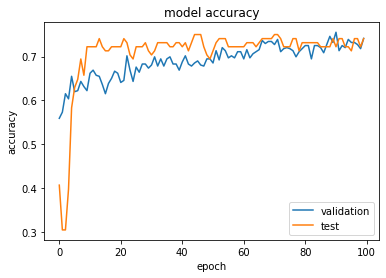

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation', 'test'], loc='lower right')
plt.show()

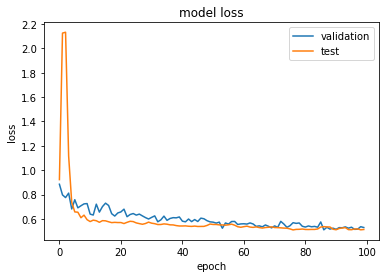

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7922077922077922